In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston

X = load_boston().data
Y = load_boston().target
Table_boston = pd.DataFrame(X)
Table_boston['Target'] = Y
Table_boston


,0,1,2,3,4,5,6,7,8,9,10,11,12,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X = X.reshape(-1, 13)
Y = Y.reshape(-1, 1)

X_std = StandardScaler().fit_transform(X)
Y_std = StandardScaler().fit_transform(Y)
print('++++++++')

++++++++


In [12]:

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_)

[0.80582318 0.16305197]
[30889.91126082  6250.3300614 ]


In [13]:
x_new =pca.transform(X)
x_new = MinMaxScaler().fit_transform(x_new)
y_new = MinMaxScaler().fit_transform(Y_std)

Boston_PCA = pd.DataFrame(x_new)

Boston_PCA.columns = ['PC_1', 'PC_2']

Boston_PCA['Y'] = y_new

Boston_PCA


,PC_1,PC_2,Y
0,0.182139,0.298391,0.422222
1,0.097303,0.336862,0.368889
2,0.096574,0.346591,0.660000
3,0.060409,0.356952,0.631111
4,0.060577,0.351541,0.693333
...,...,...,...
501,0.149500,0.326224,0.386667
502,0.148106,0.314587,0.346667
503,0.150037,0.314338,0.420000
504,0.151562,0.322470,0.377778


In [6]:
import plotly.express as px

fig = px.scatter_3d(
    data_frame=Boston_PCA,
    x=Boston_PCA['PC_1'],
    y=Boston_PCA['PC_2'],
    z=Boston_PCA['Y'],
    width=600,
    height=400,
    color=Boston_PCA['Y'],
)
fig.update_traces(marker=dict(size=5, line=dict(width=5, color='purple')),
                  selector=dict(mode='markers'))
fig.show()

In [7]:
fig = px.scatter(
    data_frame=Boston_PCA,
    x=Boston_PCA['PC_1'],
    y=Boston_PCA['PC_2'],
    width=600,
    height=400,
    color=Boston_PCA['Y'],
)
fig.update_traces(marker=dict(size=15, line=dict(width=1, color='black')),
                  selector=dict(mode='markers'))
fig.show()

In [8]:
Boston_PCA.iloc[:, 0:2]


,PC_1,PC_2
0,0.182139,0.298391
1,0.097303,0.336862
2,0.096574,0.346591
3,0.060409,0.356952
4,0.060577,0.351541
...,...,...
501,0.149500,0.326224
502,0.148106,0.314587
503,0.150037,0.314338
504,0.151562,0.322470


# 高斯过程回归

Text(0.5, 1.0, 'r2=0.2087570886522001')

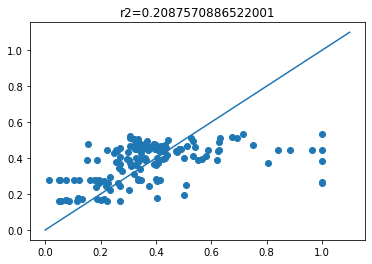

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(Boston_PCA[['PC_1', 'PC_2']],
                                                    Boston_PCA['Y'],
                                                    test_size=0.3,
                                                    random_state=0)

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel

from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

# kernel = ConstantKernel(constant_value=2, constant_value_bounds=(
#     1, 1e4)) + RBF(length_scale=5, length_scale_bounds=(1, 1e4))
#kernel = RBF()
kernel = 2 * ( 20 * RBF() + 20 * WhiteKernel() + 20 * DotProduct() + 20 * ConstantKernel() )

reg = GaussianProcessRegressor(kernel=5 * kernel, random_state=0)

reg.fit(x_train, y_train)

pred = reg.predict(x_test)

import matplotlib.pyplot as plt

plt.scatter(y_test, pred)
plt.plot([0, max([y_test.max(), pred.max()]) * 1.1],
         [0, max([y_test.max(), pred.max()]) * 1.1])

from sklearn.metrics import r2_score

plt.title(f'r2={r2_score(y_test, pred)}')

# DNN

In [2]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(Boston_PCA.iloc[:, 0:2],
                                                    Y,
                                                    test_size=0.3,
                                                    random_state=0)

from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Dense(64, input_shape=(2,), activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse', metrics=['acc'])
history = model.fit(x_train, y_train,
          #validation_split=0.2,
          epochs=100,
          verbose=0)

import matplotlib.pyplot as plt
plt.plot(history.epoch, history.history.get('loss'), label='loss')

pred = model.predict(x_test)
score = model.evaluate(x_test, y_test)
print(score)

NameError: name 'Boston_PCA' is not defined

Text(0.5, 1.0, 'r2=0.20668299044001248')

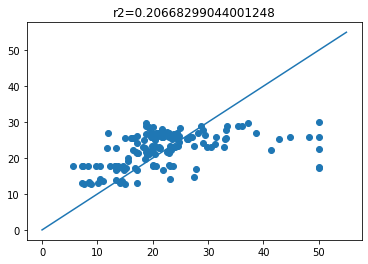

In [34]:
from sklearn.metrics import r2_score

plt.scatter(y_test, pred)
plt.plot([0, max([y_test.max(), pred.max()]) * 1.1],
         [0, max([y_test.max(), pred.max()]) * 1.1])
plt.title(f'r2={r2_score(y_test, pred)}')

In [50]:
import numpy as np
import pandas as pd
# 从Keras.datasets数据集中导入 Boston_Housing Problem
from tensorflow.keras.datasets import boston_housing
# 从Keras导入构建神经网络的库
from tensorflow.keras import models
from tensorflow.keras import layers

# 导入数据
# 数据类型均为 np.ndarray
(train_data, train_targets),(test_data, test_targets) = \
    boston_housing.load_data()

# train_data, train_targets, test_data, test_targets = train_test_split(Boston_PCA.iloc[:, 0:2],
#                                                    Y,
#                                                    test_size=0.3,
#                                                    random_state=0)

# 数据标准化

mean = train_data.mean(axis = 0)
train_data -= mean
std = train_data.std(axis = 0)
train_data /= std

# 用于测试数据标准化的均值和标准差都是在训练数据上计算得到的
test_data -= mean
test_data /= std
train_data.shape

(404, 13)

r2=-1.8074314840062002
-1.8074314840062002


Text(0.5, 1.0, 'r2=-1.8074314840062002')

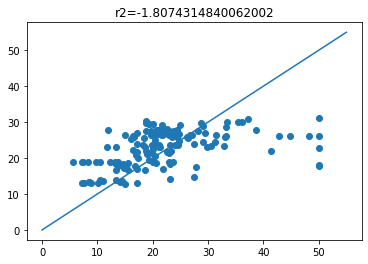

In [14]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import boston_housing
# 从Keras导入构建神经网络的库
from tensorflow.keras import models
from tensorflow.keras import layers

x_train, x_test, y_train, y_test = train_test_split(Boston_PCA.iloc[:, 0:2],
                                                    Y,
                                                    test_size=0.3,
                                                    random_state=0)

# 构建神经网络
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape = (2,)))
    model.add(layers.Dense(64, activation='relu'))
    # 网络的最后一层只有一个单元,没有激活,是一个线性层
    # 这是标量回归（标量回归是预测单一连续值的回归）的典型设置
    model.add(layers.Dense(1))
    # 编译网络用的是mse损失函数,即均方误差（MSE, mean squared error）
    # 预测值与目标值之差的平方,这是回归问题常用的损失函数

    # 平均绝对误差（MAE, mean absolute error）
    # 是预测值与目标值之差的绝对值
    model.compile(optimizer='adam', loss='mse', metrics=['acc'])
    return model
model = build_model()
model.fit(x_train, y_train,
          epochs = 100,
          batch_size = 1,
          verbose=0)

pred = model.predict(x_test)

from sklearn.metrics import r2_score

print(f'r2={r2_score(pred,y_test)}')
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

pred = model.predict(x_test)
r2 = r2_score(pred, y_test)

print(r2)
plt.plot([0, max([y_test.max(), pred.max()]) * 1.1],
         [0, max([y_test.max(), pred.max()]) * 1.1])
plt.scatter(y_test, pred)
from sklearn.metrics import r2_score

plt.title(f'r2={r2_score(pred,y_test)}')


In [ ]:

# K折验证

k = 4
num_value_sample = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print("Processing fold #", i)
    # 提取第i折的训练集与验证集
    val_data = train_data[i * num_value_sample : (i + 1) * num_value_sample]
    val_targets = train_targets[i * num_value_sample : \
                                (i + 1) * num_value_sample]
        
    partial_train_data = np.concatenate(
        [train_data[:i * num_value_sample],
         train_data[(i + 1) * num_value_sample:]],
        axis = 0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_value_sample],
         train_targets[(i + 1) * num_value_sample:]],
        axis = 0)
    
    # 使用训练集训练
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs = num_epochs,
              batch_size = 1,
              verbose=0)

    # 使用验证集验证
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)



In [54]:
pred = model.predict(test_data)

from sklearn.metrics import r2_score

print(f'r2={r2_score(test_targets,pred)}')

r2=0.8059928237585365


In [17]:
from sklearn.model_selection import KFold
import numpy as np
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4])
kf = KFold(n_splits=4)

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [1 2 3] TEST: [0]
TRAIN: [0 2 3] TEST: [1]
TRAIN: [0 1 3] TEST: [2]
TRAIN: [0 1 2] TEST: [3]
